In [39]:
import pandas as pd
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn import model_selection
from sklearn import feature_selection
from mlxtend.plotting.decision_regions import plot_decision_regions
import collections
from sklearn import pipeline
from sklearn  import preprocessing

import numpy as np
%matplotlib inline

In [3]:
iris = pd.read_csv("https://raw.githubusercontent.com/abulbasar/data/master/iris.csv")
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
features = ["SepalLengthCm", "PetalLengthCm"]
X = iris[features]
X.head()

,SepalLengthCm,PetalLengthCm
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4


In [8]:
y = iris.Species

In [9]:
y.value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

In [12]:
y = np.where(iris.Species == "Iris-versicolor", 1, 0)
collections.Counter(y)

Counter({0: 100, 1: 50})

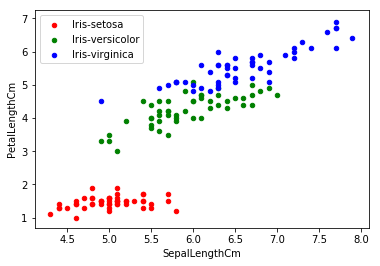

In [18]:
fig, ax = plt.subplots()
colors = ["red", "green", "blue"]
for i, s in enumerate(iris.Species.unique()):
    df = iris[iris.Species == s]
    df.plot.scatter(features[0], features[1], ax = ax, color = colors[i], label = s)

Counter({0: 100, 1: 50})

Counter({0: 100, 1: 50})
Accuracy 0.6


Text(0,0.5,'PetalLengthCm')

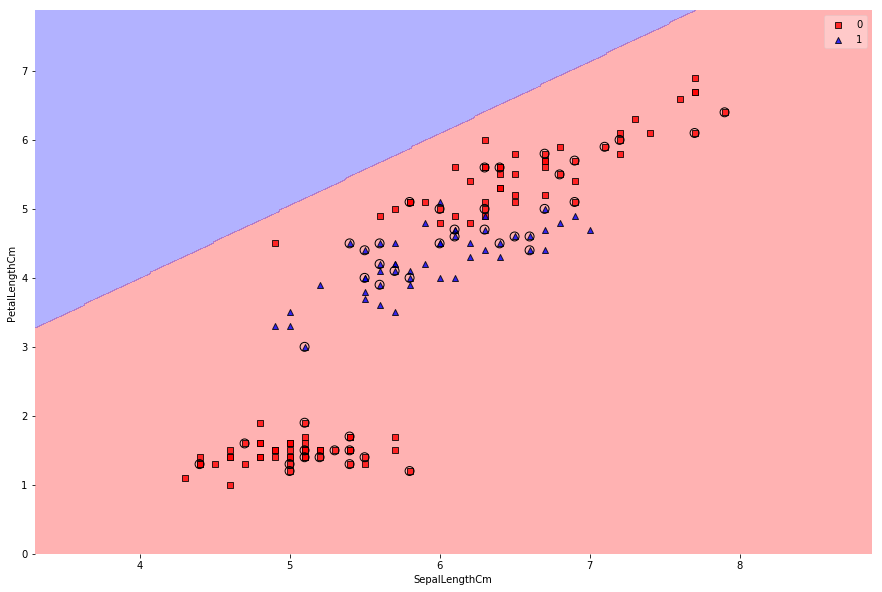

In [34]:
plt.figure(figsize = (15, 10))
y = np.where(iris.Species == "Iris-versicolor", 1, 0)
print(collections.Counter(y))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
lr = linear_model.LogisticRegression()
lr.fit(X_train, y_train)
print("Accuracy", lr.score(X_test, y_test))
plot_decision_regions(X.values, y, lr, X_highlight=X_test.values)
plt.xlabel(features[0])
plt.ylabel(features[1])

Counter({0: 100, 1: 50})
Accuracy 0.977777777778


Text(0,0.5,'PetalLengthCm')

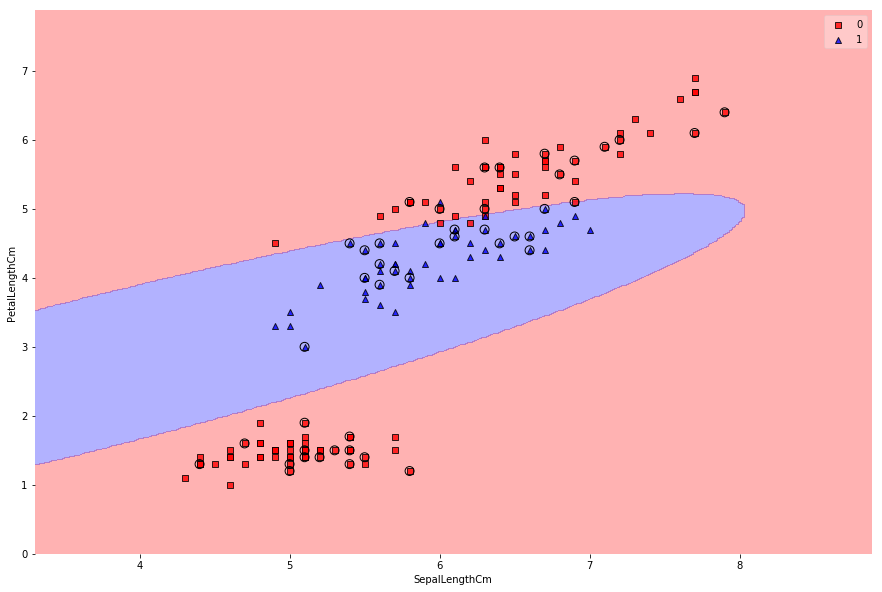

In [47]:

plt.figure(figsize = (15, 10))
y = np.where(iris.Species == "Iris-versicolor", 1, 0)
print(collections.Counter(y))

features = ["SepalLengthCm", "PetalLengthCm"]
#features = iris.columns[1:-1]
X = iris[features]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

est = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=3, include_bias=False)),
    ("lr", linear_model.LogisticRegression())
])

est.fit(X_train, y_train)
print("Accuracy", est.score(X_test, y_test))
plot_decision_regions(X.values, y, est, X_highlight=X_test.values)
plt.xlabel(features[0])
plt.ylabel(features[1])

